In [4]:
#Long Short Term Memory (LSTM) deep learning neural network model 

In [5]:
#Import Modules
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
#import CSV
df = pd.read_csv('BTC_Daily_Final.csv')
df.head()

,Unnamed: 0,Date,Close
0,999,2019-02-15,3602.47
1,998,2019-02-16,3618.41
2,997,2019-02-17,3667.58
3,996,2019-02-18,3898.60
4,995,2019-02-19,3907.79


In [7]:
df.tail()

,Unnamed: 0,Date,Close
995,4,2021-11-06,61470.61
996,3,2021-11-07,63273.59
997,2,2021-11-08,67525.83
998,1,2021-11-09,66947.66
999,0,2021-11-10,67155.31


In [8]:
df.shape

(1000, 3)

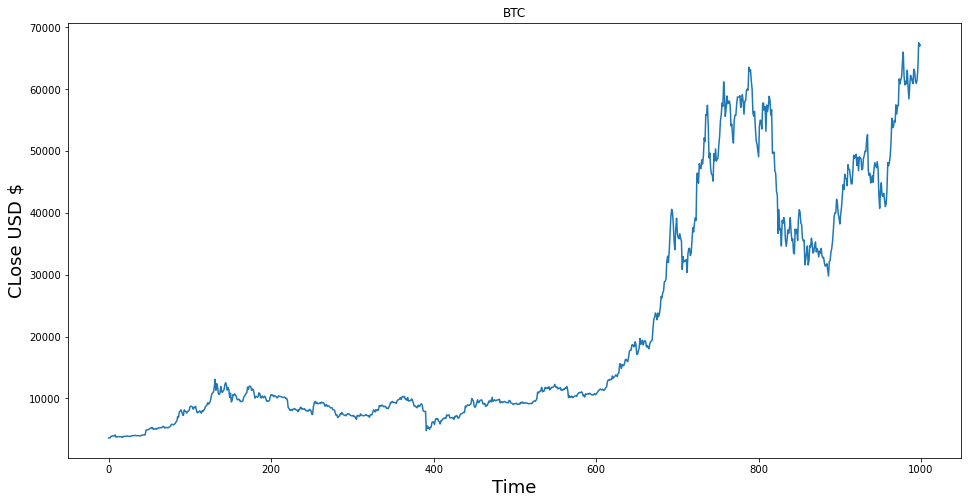

In [9]:
#Plot time series
plt.figure(figsize=(16,8))
plt.title('BTC')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('CLose USD $', fontsize = 18)
plt.show()

In [10]:
#Create new frame with only the closing prices

data = df.filter(['Close'])

#Convert to numpy Array

dataset = data.values

#Identify training data

training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

800

In [11]:
#Scale the Data between 0 and 1 - preserves shape of original data distribution
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [2.49361110e-04],
       [1.01856348e-03],
       [4.63257876e-03],
       [4.77634467e-03],
       [5.74547396e-03],
       [5.23814768e-03],
       [5.62439146e-03],
       [8.06105937e-03],
       [2.20717434e-03],
       [3.52687969e-03],
       [3.23449831e-03],
       [3.37278891e-03],
       [3.30426936e-03],
       [3.44991252e-03],
       [3.40188626e-03],
       [3.21134559e-03],
       [1.76508244e-03],
       [3.99321938e-03],
       [4.05751512e-03],
       [4.24211118e-03],
       [4.10522851e-03],
       [5.32778627e-03],
       [4.91760759e-03],
       [4.21035440e-03],
       [4.38431271e-03],
       [4.12259306e-03],
       [4.29655137e-03],
       [5.02617509e-03],
       [6.31240285e-03],
       [5.92381252e-03],
       [6.02815622e-03],
       [6.46180051e-03],
       [6.89215961e-03],
       [5.91599065e-03],
       [6.01438973e-03],
       [6.31287216e-03],
       [6.09651933e-03],
       [5.21953164e-03],
       [5.41398324e-03],


In [12]:
#Create Training data set

#Create Scaled Training data set
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00024936, 0.00101856, 0.00463258, 0.00477634,
       0.00574547, 0.00523815, 0.00562439, 0.00806106, 0.00220717,
       0.00352688, 0.0032345 , 0.00337279, 0.00330427, 0.00344991,
       0.00340189, 0.00321135, 0.00176508, 0.00399322, 0.00405752,
       0.00424211, 0.00410523, 0.00532779, 0.00491761, 0.00421035,
       0.00438431, 0.00412259, 0.00429655, 0.00502618, 0.0063124 ,
       0.00592381, 0.00602816, 0.0064618 , 0.00689216, 0.00591599,
       0.00601439, 0.00631287, 0.00609652, 0.00521953, 0.00541398,
       0.0068141 , 0.00665391, 0.00783407, 0.00789226, 0.00784502,
       0.00848031, 0.01963007, 0.0208082 , 0.02027725, 0.02194002,
       0.02254919, 0.02452625, 0.02556859, 0.02420915, 0.02668477,
       0.02213432, 0.02261364, 0.02257   , 0.02391661, 0.0222529 ])]
[0.024580216058730342]



In [13]:
#Convert x_train and y_train to numpy arrays to train LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape data - allows for quicker calculation/convergence of liner coefficient parameters 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(740, 60, 1)

In [15]:
#Create LSTM - Dense layer receieves input from all neurons in th previous layer
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#Compile Model
#ADAM - Adaptive Moment Estimation 
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#Run Model - 2 Epochs
model.fit(x_train, y_train, batch_size=1, epochs= 2)

Epoch 1/2
740/740 [==============================] - 64s 86ms/step - loss: 0.0032
Epoch 2/2
740/740 [==============================] - 55s 75ms/step - loss: 0.0013


In [18]:
#Test Data set

#Create new array with scaled values

test_data = scaled_data[training_data_len - 60: , :]
#Create Data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
#Convert data to numpy array
x_test = np.array(x_test)

In [20]:
#Reshape Data - needed in time series data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#Predictive output
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
#Evaluate Model - Root Mean Square Error (RMSE) 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


30.587267187499748

In [23]:
#Assign data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


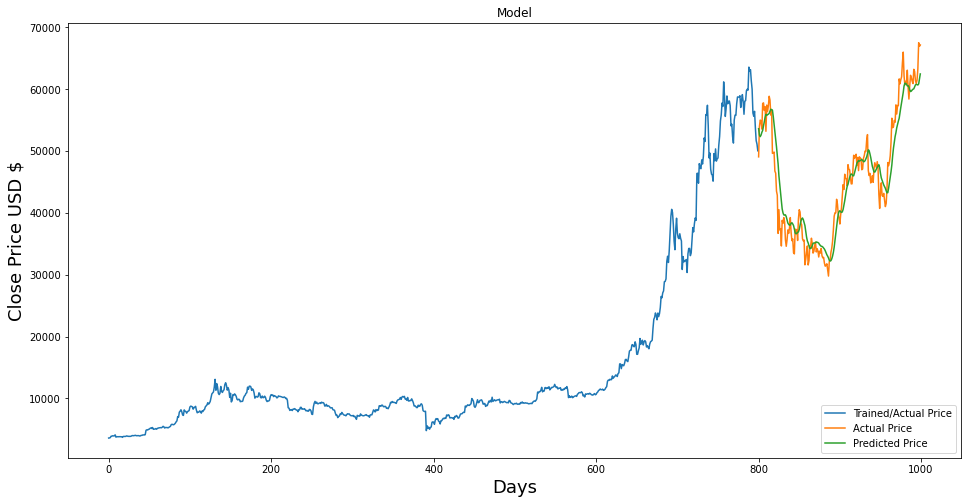

In [24]:
#Plot Results
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Close Price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained/Actual Price', 'Actual Price', 'Predicted Price'], loc= 'lower right')
plt.show()

In [25]:
#Print actual and predicted prices
valid

,Close,Predictions
800,49066.77,53619.320312
801,54001.39,52579.386719
802,55011.97,52338.585938
803,54846.22,52593.964844
804,53555.00,53033.574219
...,...,...
995,61470.61,60737.757812
996,63273.59,60683.867188
997,67525.83,60860.828125
998,66947.66,61642.050781


In [26]:
results = valid
results

,Close,Predictions
800,49066.77,53619.320312
801,54001.39,52579.386719
802,55011.97,52338.585938
803,54846.22,52593.964844
804,53555.00,53033.574219
...,...,...
995,61470.61,60737.757812
996,63273.59,60683.867188
997,67525.83,60860.828125
998,66947.66,61642.050781


In [27]:
df

,Unnamed: 0,Date,Close
0,999,2019-02-15,3602.47
1,998,2019-02-16,3618.41
2,997,2019-02-17,3667.58
3,996,2019-02-18,3898.60
4,995,2019-02-19,3907.79
...,...,...,...
995,4,2021-11-06,61470.61
996,3,2021-11-07,63273.59
997,2,2021-11-08,67525.83
998,1,2021-11-09,66947.66


In [28]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2019-02-15,3602.47
1,2019-02-16,3618.41
2,2019-02-17,3667.58
3,2019-02-18,3898.60
4,2019-02-19,3907.79
...,...,...
995,2021-11-06,61470.61
996,2021-11-07,63273.59
997,2021-11-08,67525.83
998,2021-11-09,66947.66


In [29]:
#Identify data from day 800 onwards
df = df.iloc[800:]
df

,Date,Close
800,2021-04-25,49066.77
801,2021-04-26,54001.39
802,2021-04-27,55011.97
803,2021-04-28,54846.22
804,2021-04-29,53555.00
...,...,...
995,2021-11-06,61470.61
996,2021-11-07,63273.59
997,2021-11-08,67525.83
998,2021-11-09,66947.66


In [30]:
results

,Close,Predictions
800,49066.77,53619.320312
801,54001.39,52579.386719
802,55011.97,52338.585938
803,54846.22,52593.964844
804,53555.00,53033.574219
...,...,...
995,61470.61,60737.757812
996,63273.59,60683.867188
997,67525.83,60860.828125
998,66947.66,61642.050781


In [31]:
BTC_LSTM_Results = pd.merge(df, results, on=['Close'])
BTC_LSTM_Results

,Date,Close,Predictions
0,2021-04-25,49066.77,53619.320312
1,2021-04-26,54001.39,52579.386719
2,2021-04-27,55011.97,52338.585938
3,2021-04-28,54846.22,52593.964844
4,2021-04-29,53555.00,53033.574219
...,...,...,...
195,2021-11-06,61470.61,60737.757812
196,2021-11-07,63273.59,60683.867188
197,2021-11-08,67525.83,60860.828125
198,2021-11-09,66947.66,61642.050781


In [32]:
BTC_LSTM_Results = BTC_LSTM_Results.reset_index()
BTC_LSTM_Results

,index,Date,Close,Predictions
0,0,2021-04-25,49066.77,53619.320312
1,1,2021-04-26,54001.39,52579.386719
2,2,2021-04-27,55011.97,52338.585938
3,3,2021-04-28,54846.22,52593.964844
4,4,2021-04-29,53555.00,53033.574219
...,...,...,...,...
195,195,2021-11-06,61470.61,60737.757812
196,196,2021-11-07,63273.59,60683.867188
197,197,2021-11-08,67525.83,60860.828125
198,198,2021-11-09,66947.66,61642.050781


In [33]:
df = pd.read_csv('BTC_Daily_Final.csv')
df

,Unnamed: 0,Date,Close
0,999,2019-02-15,3602.47
1,998,2019-02-16,3618.41
2,997,2019-02-17,3667.58
3,996,2019-02-18,3898.60
4,995,2019-02-19,3907.79
...,...,...,...
995,4,2021-11-06,61470.61
996,3,2021-11-07,63273.59
997,2,2021-11-08,67525.83
998,1,2021-11-09,66947.66


In [34]:
BTC_Final_Time_Series = df[['Date','Close']]
BTC_Final_Time_Series

,Date,Close
0,2019-02-15,3602.47
1,2019-02-16,3618.41
2,2019-02-17,3667.58
3,2019-02-18,3898.60
4,2019-02-19,3907.79
...,...,...
995,2021-11-06,61470.61
996,2021-11-07,63273.59
997,2021-11-08,67525.83
998,2021-11-09,66947.66


In [35]:
#Final Dataframe
BTC_Final_Time_Series = BTC_Final_Time_Series.reset_index()
BTC_Final_Time_Series

,index,Date,Close
0,0,2019-02-15,3602.47
1,1,2019-02-16,3618.41
2,2,2019-02-17,3667.58
3,3,2019-02-18,3898.60
4,4,2019-02-19,3907.79
...,...,...,...
995,995,2021-11-06,61470.61
996,996,2021-11-07,63273.59
997,997,2021-11-08,67525.83
998,998,2021-11-09,66947.66


In [39]:
from sqlalchemy import create_engine

In [40]:
asset_connection_string = "postgres:dataprojects123@demodatabase.c82n6mge8kkd.us-east-2.rds.amazonaws.com/Crypto_Data" 
engine = create_engine(f'postgresql://{asset_connection_string}') 

In [41]:
BTC_LSTM_Results.to_sql(name='btc_lstm_results', con=engine, if_exists='append', index=False)

In [42]:
BTC_Final_Time_Series.to_sql(name='btc_final_time_series', con=engine, if_exists='append', index=False)

ERROR! Session/line number was not unique in database. History logging moved to new session 1680
